In [625]:
# imports
import numpy as np

In [626]:
# parameters
n = 100                 # number of data points
d = 1                   # number of features
degree = 10              # degree of the polynomial
scale = 1               # controls how large synthetic data gets
num_iters = 500000      # number of iterations that it spends training
learning_rate = 0.01   # controls how much gradient descent affects the change to theta
noise = 0               # amount of deviation

In [627]:
X = np.random.rand(n, d) * scale            # random feature values
X_poly = np.hstack([X**i for i in range(1, degree + 1)])    # raises
X_aug = np.hstack([np.ones((n, 1)), X_poly])

In [628]:
num_params = 1 + d * degree

theta_true = (np.random.rand(num_params, 1) - 0.5) * scale  # true theta
theta = np.zeros((num_params, 1))                           # our theta to be refined

In [629]:
y = X_aug @ theta_true + noise * np.random.randn(n, 1)  # calculate the y values and add Gaussian noise for variation

In [630]:
for _ in range(num_iters):          # repeat our gradient descent loop to minimize squared error

    y_hat = X_aug @ theta               # compute our predicted y values

    resid = y_hat - y                   # calculate the signed residual

    grad = (1 / n) * (X_aug.T @ resid)  # compute gradient of mean squared error

    theta -= learning_rate * grad       # update parameters to reduce error


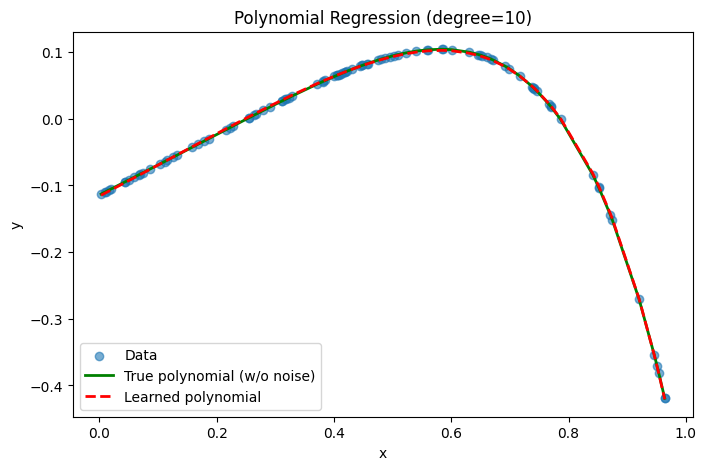

In [631]:
import matplotlib.pyplot as plt

if d == 1:
    # extract x values
    x = X[:, 0]

    # sort for a clean line
    idx = np.argsort(x)
    x_sorted = x[idx]

    # build augmented matrix for sorted x
    X_line_poly = np.hstack([x_sorted.reshape(-1, 1)**i for i in range(1, degree + 1)])
    X_line = np.hstack([np.ones((n, 1)), X_line_poly])

    # predictions
    y_true_line = X_line @ theta_true
    y_learned_line = X_line @ theta

    # plot
    plt.figure(figsize=(8, 5))
    plt.scatter(x, y, alpha=0.6, label="Data")
    plt.plot(x_sorted, y_true_line, color="green", linewidth=2, label="True polynomial (w/o noise)")
    plt.plot(x_sorted, y_learned_line, color="red", linestyle="--", linewidth=2, label="Learned polynomial")

    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(f"Polynomial Regression (degree={degree})")
    plt.legend()
    plt.show()

In [632]:
# print results
print(f"\n{'Parameter':<15} | {'True':>10} | {'Learned':>10} | {'Error':>10}")
print("-" * 55)

# bias
true_val = theta_true[0, 0]
learned_val = theta[0, 0]
print(f"{'bias':<15} | {true_val:10.5f} | {learned_val:10.5f} | {learned_val - true_val:10.5f}")

idx = 1
for deg in range(1, degree + 1):
    for feat in range(d):
        name = f"x{feat+1}^{deg}"
        true_val = theta_true[idx, 0]
        learned_val = theta[idx, 0]
        error = learned_val - true_val

        print(f"{name:<15} | {true_val:10.5f} | {learned_val:10.5f} | {error:10.5f}")
        idx += 1


Parameter       |       True |    Learned |      Error
-------------------------------------------------------
bias            |   -0.11417 |   -0.11588 |   -0.00171
x1^1            |    0.44838 |    0.45874 |    0.01035
x1^2            |   -0.00123 |    0.08418 |    0.08541
x1^3            |    0.23636 |   -0.13559 |   -0.37195
x1^4            |   -0.49142 |   -0.21312 |    0.27830
x1^5            |   -0.25762 |   -0.21396 |    0.04367
x1^6            |   -0.36486 |   -0.17998 |    0.18488
x1^7            |   -0.17292 |   -0.13345 |    0.03947
x1^8            |    0.15157 |   -0.08536 |   -0.23693
x1^9            |    0.36285 |   -0.04070 |   -0.40354
x1^10           |   -0.36998 |   -0.00143 |    0.36855


In [633]:
# print final learned polynomial equation
terms = [f"{theta[0,0]:.5f}"]  # bias term

idx = 1
for deg in range(1, degree + 1):
    for feat in range(d):
        coef = theta[idx, 0]
        terms.append(f"{coef:+.5f} * x{feat+1}^{deg}")
        idx += 1

equation = "y = " + " ".join(terms)
print("\nLearned polynomial:")
print(equation)


Learned polynomial:
y = -0.11588 +0.45874 * x1^1 +0.08418 * x1^2 -0.13559 * x1^3 -0.21312 * x1^4 -0.21396 * x1^5 -0.17998 * x1^6 -0.13345 * x1^7 -0.08536 * x1^8 -0.04070 * x1^9 -0.00143 * x1^10
